# License 
***
Copyright (C) 2017 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


***
# R: Part 0 - Basics, dplyr, and ggplot2

## 1. Standard output

Two primary R core functions are used to print information to the console:
* `print()`: a generic function that responds differently to different classes of R objects
* `cat()`: simply attempts to print string literals

In [3]:
x <- 'Hello World!'
print(x)
cat(x)
x

class(x) <- 'some.class' # '.' is just a character, it does not denote object membership
print(x)
cat(x) 

[1] "Hello World!"
Hello World!

[1] "Hello World!"

[1] "Hello World!"
attr(,"class")
[1] "some.class"
Hello World!

In [4]:
# An object with no functions or operators is also printed to the console
x 

[1] "Hello World!"
attr(,"class")
[1] "some.class"

***
## 2. Importing libraries

R contains thousands of libraries, often called *packages*, for many different purposes

Packages are:
* Nearly always free and open source
* Installed using the `install.packages()` function or a GUI command
* Of varying quality and licensing
* Loaded using the `library()` function, after being installed

In [5]:
library(dplyr)   # popular package for data wrangling with consistent syntax
library(ggplot2) # popular package for plotting with consistent syntax

***
## 3. Setting the working directory

#### Enter the directory location of this file within single quotes

In [6]:
# '<-' is the preferred assignment operator in R
# '/' is the safest directory separator character to use

git_dir <- 'C:/path/to/GWU_data_mining/01_basic_data_prep/src/notebooks/r'

#### Set the working directory

* The working directory is where files are written to and read from by default
* `setwd()` sets the working directory
* `getwd()` prints the current working directory

In [7]:
setwd(git_dir)
getwd()

[1] "C:/workspace/GWU_data_mining/01_basic_data_prep/src/notebooks/r"

***
## 4. Generating a sample data set

#### Set the number of rows and columns for the sample data set

In [8]:
n_rows <- 1000
n_vars <- 2

#### Create a key variable
* A key variable has a unique value for each row of a data set
* `seq()` generates values from a number (default = 1), to another number, by a certain value (default = 1)
* Many types of data structures in R have key variables (a.k.a. row names) by default

In [9]:
key <- seq(n_rows)

#### Show the first five elements of `key`

Most data structures in R can be 'sliced', i.e. using numeric indices to select a subset of items 

In [10]:
key[1:5] 

[1] 1 2 3 4 5

#### Create lists of strings that will become column names
`paste()` concatentates strings with a separator character in between them

In [11]:
num_vars <- paste('numeric', seq_len(n_vars), sep = '')
num_vars 

char_vars <- paste('char', seq_len(n_vars), sep = '')
char_vars

[1] "numeric1" "numeric2"

[1] "char1" "char2"

#### Initialize a data.frame with the key variable

In [12]:
scratch_df <- data.frame(INDEX = key)

# head() displays the top of a data structure
head(scratch_df) 

INDEX
1
2
3
4
5
6


#### Add n_var numeric columns, each with n_row rows, to the data.frame
* Each column contains random uniform numeric values generated by runif()
* `replicate()` replicates `n_row` length lists of numeric values `n_vars` times

In [13]:
scratch_df[, num_vars] <- replicate(n_vars, runif(n_rows))
head(scratch_df)

INDEX,numeric1,numeric2
1,0.3474129,0.4332860769
2,0.6859666,0.9104925687
3,0.8332253,0.0006273664
4,0.1599061,0.9637706790
5,0.6742479,0.7491531989
6,0.8877142,0.7471935684


#### Add n_var character columns, each with n_row rows, to the data.frame
* Create a list of strings from which to generate random text variables
* `sapply()` applies a function to a sequence of values
* `LETTERS` is a character vector containing uppercase letters
* An anonymous function is defined that replicates a value 8 times with no seperator character
* `replicate()` replicates n_var lists of n_row elements from text_draw sampled randomly from `test_draw` using the `sample()` function

In [14]:
text_draw <- sapply(LETTERS[1:7],
                    FUN = function(x) paste(rep(x, 8), collapse = ""))
text_draw                                     

A          B          C          D          E          F          G 
"AAAAAAAA" "BBBBBBBB" "CCCCCCCC" "DDDDDDDD" "EEEEEEEE" "FFFFFFFF" "GGGGGGGG"

In [15]:
scratch_df[, char_vars] <- replicate(n_vars,
                                     sample(text_draw, n_rows, replace = TRUE))
head(scratch_df) 

INDEX,numeric1,numeric2,char1,char2
1,0.3474129,0.4332860769,CCCCCCCC,GGGGGGGG
2,0.6859666,0.9104925687,EEEEEEEE,AAAAAAAA
3,0.8332253,0.0006273664,GGGGGGGG,DDDDDDDD
4,0.1599061,0.9637706790,BBBBBBBB,AAAAAAAA
5,0.6742479,0.7491531989,AAAAAAAA,BBBBBBBB
6,0.8877142,0.7471935684,FFFFFFFF,BBBBBBBB


#### Convert from standard data.frame to dlpyr table
* `dplyr` is a popular, intuitive, and effcient package for manipulating data sets
* R has many other data types, here are few: http://www.statmethods.net/input/datatypes.html

In [16]:
scratch_tbl <- tbl_df(scratch_df)

#### Use the dplyr::glimpse function to see a summary of the generated data set 

`<package>::<method>` notation is used to specify a method (or function) is a member of certain package, i.e. in the 'namespace' of a certain package


In [17]:
glimpse(scratch_tbl)

Observations: 1,000
Variables: 5
$ INDEX    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,...
$ numeric1 <dbl> 0.34741287, 0.68596664, 0.83322530, 0.15990611, 0.67424790...
$ numeric2 <dbl> 0.4332860769, 0.9104925687, 0.0006273664, 0.9637706790, 0....
$ char1    <chr> "CCCCCCCC", "EEEEEEEE", "GGGGGGGG", "BBBBBBBB", "AAAAAAAA"...
$ char2    <chr> "GGGGGGGG", "AAAAAAAA", "DDDDDDDD", "AAAAAAAA", "BBBBBBBB"...


***
## 5. Plotting variables in a table

#### Use  `ggplot` to plot univariate densities of numeric1 and char1 with `geom_bar()`
* `ggplot` allows you to overlay graphics using the '+' operator
* `gtitle` adds title
* `coord_flip` rotates the bar chart

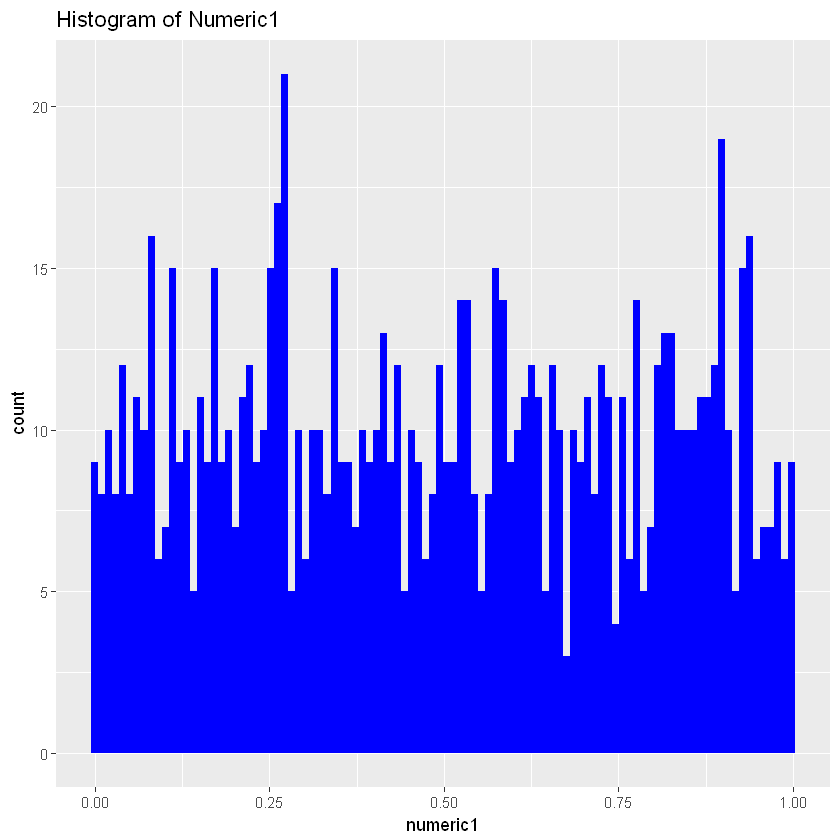

In [18]:
ggplot(scratch_tbl, aes(numeric1)) +
  geom_bar(stat = "bin", fill = "blue", bins = 100) +
  ggtitle('Histogram of Numeric1')

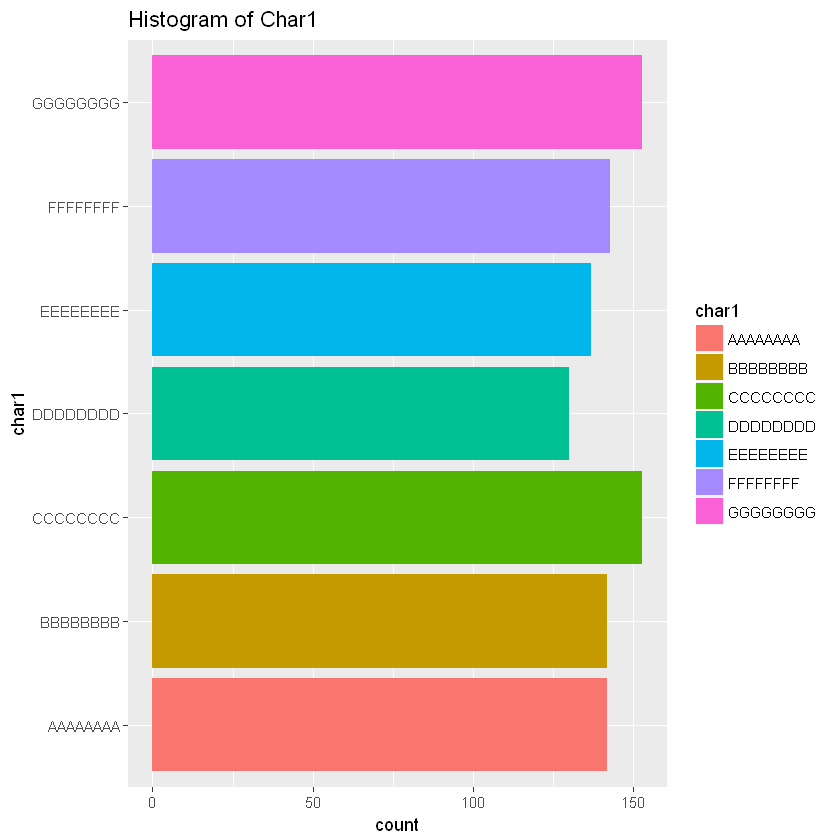

In [19]:
ggplot(scratch_tbl, aes(char1)) +
  geom_bar(aes(fill=char1)) +
  ggtitle('Histogram of Char1') +
  coord_flip()

***
## 6. Subsetting tables

#### Subset columns using `dplyr::select`

Subset a range of variables with similar names and numeric suffixes

In [20]:
num_vars <- select(scratch_tbl, num_range('numeric', 1:n_vars))
head(num_vars)

numeric1,numeric2
0.3474129,0.4332860769
0.6859666,0.9104925687
0.8332253,0.0006273664
0.1599061,0.9637706790
0.6742479,0.7491531989
0.8877142,0.7471935684


Subset all the variables whose names begin with 'char'

In [21]:
char_vars <- select(scratch_tbl, starts_with('char'))
head(char_vars)

char1,char2
CCCCCCCC,GGGGGGGG
EEEEEEEE,AAAAAAAA
GGGGGGGG,DDDDDDDD
BBBBBBBB,AAAAAAAA
AAAAAAAA,BBBBBBBB
FFFFFFFF,BBBBBBBB


Subset variables by their names

In [22]:
mixed_vars <- select(scratch_tbl, one_of('numeric1', 'char1'))
head(mixed_vars)

numeric1,char1
0.3474129,CCCCCCCC
0.6859666,EEEEEEEE
0.8332253,GGGGGGGG
0.1599061,BBBBBBBB
0.6742479,AAAAAAAA
0.8877142,FFFFFFFF


#### Subset columns with several different `dplyr` methods

Subset/slice rows using their numeric indices

In [23]:
some_rows <- slice(scratch_tbl, 1:10)
some_rows

INDEX,numeric1,numeric2,char1,char2
1,0.3474129,0.4332860769,CCCCCCCC,GGGGGGGG
2,0.6859666,0.9104925687,EEEEEEEE,AAAAAAAA
3,0.8332253,0.0006273664,GGGGGGGG,DDDDDDDD
4,0.1599061,0.9637706790,BBBBBBBB,AAAAAAAA
5,0.6742479,0.7491531989,AAAAAAAA,BBBBBBBB
6,0.8877142,0.7471935684,FFFFFFFF,BBBBBBBB
7,0.8268970,0.7529136408,GGGGGGGG,GGGGGGGG
8,0.3910927,0.2017313016,GGGGGGGG,CCCCCCCC
9,0.8908531,0.7093369325,DDDDDDDD,GGGGGGGG
10,0.9922066,0.0265828427,FFFFFFFF,DDDDDDDD


Subset top rows based on the value of a certain variable

In [24]:
sorted_top_rows <- top_n(scratch_tbl, 10, numeric1)
sorted_top_rows 

INDEX,numeric1,numeric2,char1,char2
10,0.9922066,0.02658284,FFFFFFFF,DDDDDDDD
68,0.9977602,0.85634274,DDDDDDDD,DDDDDDDD
101,0.9972045,0.80539363,AAAAAAAA,CCCCCCCC
106,0.9987065,0.11530087,CCCCCCCC,GGGGGGGG
241,0.9942145,0.73674233,EEEEEEEE,FFFFFFFF
404,0.9984709,0.48149003,BBBBBBBB,FFFFFFFF
518,0.9946709,0.57738147,EEEEEEEE,FFFFFFFF
582,0.9936982,0.95461096,AAAAAAAA,CCCCCCCC
656,0.9944665,0.71217725,CCCCCCCC,BBBBBBBB
721,0.9977745,0.57664150,FFFFFFFF,AAAAAAAA


Subset rows where a certain variable has a certain value

In [25]:
AAAAAAAA_rows <- filter(scratch_tbl, char1 == 'AAAAAAAA')
head(AAAAAAAA_rows)

INDEX,numeric1,numeric2,char1,char2
5,0.67424790,0.7491532,AAAAAAAA,BBBBBBBB
13,0.21715588,0.8610248,AAAAAAAA,EEEEEEEE
15,0.12470682,0.9516568,AAAAAAAA,CCCCCCCC
24,0.06737993,0.6272992,AAAAAAAA,EEEEEEEE
27,0.22187690,0.6680512,AAAAAAAA,DDDDDDDD
28,0.54766823,0.7143838,AAAAAAAA,BBBBBBBB


***
## 7. Updating a table
`dplyr`, as a best practice, does not support in-place overwrites of data 

`dplyr::transform` enables the creation of new variables from existing variables

In [26]:
scratch_tbl2 <- transform(scratch_tbl, 
                          new_numeric = round(numeric1, 1))
head(scratch_tbl2)

INDEX,numeric1,numeric2,char1,char2,new_numeric
1,0.3474129,0.4332860769,CCCCCCCC,GGGGGGGG,0.3
2,0.6859666,0.9104925687,EEEEEEEE,AAAAAAAA,0.7
3,0.8332253,0.0006273664,GGGGGGGG,DDDDDDDD,0.8
4,0.1599061,0.9637706790,BBBBBBBB,AAAAAAAA,0.2
5,0.6742479,0.7491531989,AAAAAAAA,BBBBBBBB,0.7
6,0.8877142,0.7471935684,FFFFFFFF,BBBBBBBB,0.9


`dplyr::mutate` enables the creation of new variables from existing variables and computed variables

In [27]:
scratch_tbl2 <- mutate(scratch_tbl, 
                       new_numeric = round(numeric1, 1), 
                       new_numeric2 = new_numeric * 10)
head(scratch_tbl2)

INDEX,numeric1,numeric2,char1,char2,new_numeric,new_numeric2
1,0.3474129,0.4332860769,CCCCCCCC,GGGGGGGG,0.3,3
2,0.6859666,0.9104925687,EEEEEEEE,AAAAAAAA,0.7,7
3,0.8332253,0.0006273664,GGGGGGGG,DDDDDDDD,0.8,8
4,0.1599061,0.9637706790,BBBBBBBB,AAAAAAAA,0.2,2
5,0.6742479,0.7491531989,AAAAAAAA,BBBBBBBB,0.7,7
6,0.8877142,0.7471935684,FFFFFFFF,BBBBBBBB,0.9,9


`dplyr::transmute` enables the creation of new variables from existing variables and computed variables, but keeps only newly created variables

In [28]:
scratch_tbl2 <- transmute(scratch_tbl, 
                          new_numeric = round(numeric1, 1), 
                          new_numeric2 = new_numeric * 10)
head(scratch_tbl2)

new_numeric,new_numeric2
0.3,3
0.7,7
0.8,8
0.2,2
0.7,7
0.9,9


***
## 8. Sorting a table 
Sort tables by one variable or more variables using `dplyr::arrange`

In [29]:
# one sort var: char1
sorted <- arrange(char_vars, char1)
head(sorted)

char1,char2
AAAAAAAA,BBBBBBBB
AAAAAAAA,EEEEEEEE
AAAAAAAA,CCCCCCCC
AAAAAAAA,EEEEEEEE
AAAAAAAA,DDDDDDDD
AAAAAAAA,BBBBBBBB


In [30]:
# two sort vars: char1, char2
sorted2 <- arrange(char_vars, char1, char2)
head(sorted2)

char1,char2
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA
AAAAAAAA,AAAAAAAA


***
## 9. Adding data to the table
Add data to a table using `dplyr:: bind` and `dplyr::join`
* Bind methods smash tables together
  * `bindr` stacks data sets vertically
  * `bindc` combines data sets horizontally
* `join` combines tables based on matching values of a shared key (or 'by') variable

In [31]:
bindr <- bind_rows(sorted, sorted2)
nrow(bindr) #nrow - number of rows

[1] 2000

In [32]:
bindc <- bind_cols(sorted, sorted2)
ncol(bindc) # ncol - number of columns

[1] 4

#### Create two tables to join on a key variable 

In [33]:
sorted_left <- arrange(select(scratch_tbl, one_of('INDEX', 'char1')), char1)
right <- select(scratch_tbl, one_of('INDEX', 'numeric1'))

#### Perform join
Joined table contains `char1` from the left table and `numeric1` from the right table matched by the value of `INDEX`

In [34]:
joined <- left_join(sorted_left, right, by = 'INDEX')
head(joined)

INDEX,char1,numeric1
5,AAAAAAAA,0.67424790
13,AAAAAAAA,0.21715588
15,AAAAAAAA,0.12470682
24,AAAAAAAA,0.06737993
27,AAAAAAAA,0.22187690
28,AAAAAAAA,0.54766823


***
## 10. Comparing tables using `dplyr::all.equal`
* `dplyr::all.equal` will test tables for equality despite the order of rowsand/or columns
* Very useful for keeping track of changes to important tables

#### Create a table for comparision 
`test` will have the same values as `joined` but in a different order

In [35]:
test <- select(scratch_tbl, one_of('INDEX', 'numeric1', 'char1'))

#### Perform comparisons

In [36]:
print(all.equal(joined, test, ignore_row_order = FALSE))

[1] "Same row values, but different order"


In [37]:
print(all.equal(joined, test, ignore_col_order = FALSE))

[1] "Same column names, but different order"


In [38]:
print(all.equal(joined, test))

[1] TRUE


***
## 11. Summarizing tables
Combine rows of tables into summary values, like means or sums, using:
* `dplyr::summarise` 
* `dplyr::summarise_each`

In [39]:
ave <- summarise(num_vars, avg = mean(numeric1)) # avg is the name of the new variable
ave

avg
0.4963676


In [40]:
all_aves <-summarise_each(num_vars, funs(mean)) # funs() defines the summary function
all_aves

numeric1,numeric2
0.4963676,0.50781


***
## 12. By group processing
By groups allow you to divide and process a data set based on the values of a certain variable
* `dplyr::group_by` groups a data set together based on the values of a certain variable
* Operations can then be applied to groups

In [41]:
grouped <- group_by(joined, char1)

In [42]:
grouped <- summarise(grouped, avg = mean(numeric1)) # avg is the name of the new variable
grouped

char1,avg
AAAAAAAA,0.4920375
BBBBBBBB,0.5358034
CCCCCCCC,0.5129227
DDDDDDDD,0.4786441
EEEEEEEE,0.4459109
FFFFFFFF,0.4992131
GGGGGGGG,0.5048102


***
## 13. Transposing a table
* Transposing a matrix simply switches row and columns values
* Transposing a data.frame or dplyr table is more complex because of metadata associated with variable names and row indices

In [43]:
transposed = t(scratch_tbl)
glimpse(transposed)

 chr [1:5, 1:1000] "   1" "0.3474128747" "0.4332860769" "CCCCCCCC" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5] "INDEX" "numeric1" "numeric2" "char1" ...
  ..$ : NULL


Often, instead of simply transposing, a data set will need to be reformatted in a **melt/stack** - **column split** - **cast** action described in Hadley Wickham's *Tidy Data*:
https://www.jstatsoft.org/article/view/v059i10

See also dplyr::gather and dplyr::spread()

***
## 14. Exporting and importing a table
* The R core function `write.table` enables writing text files
  * Use the `sep` option to specifiy the columns delimiter character
  * `row.names = FALSE` indicates not to save the row number to the text file
* The similar R core function `read.table` enables reading text files

In [44]:
# export
filename <- paste(git_dir, 'scratch.csv', sep = '/') 
write.table(scratch_tbl, file = filename, quote = FALSE, sep = ',',
            row.names = FALSE) 

In [45]:
# import
import <- read.table(filename, header = TRUE, sep = ',')